In [1]:
## first line of code is to clear R's memory
rm(list=ls())

In [2]:
# Install Cicero
if (FALSE){
    BiocManager::install("cicero")
    remotes::install_github('satijalab/seurat-wrappers')
    remotes::install_github("cole-trapnell-lab/cicero-release", ref = "monocle3")  
    BiocManager::install("BSgenome.Hsapiens.UCSC.hg19")
    
}

In [2]:
#libraries
library(Signac)
library(Seurat)
library(rtracklayer)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(qs)
library(SeuratWrappers)
library(ggplot2)
library(patchwork)
library(cicero)




The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

The legacy packages maptools, rgdal, and rgeos, underp

In [ ]:
#####################
#Read processed Seurat Object
###################
seurat_object <- qread("complete/GSE184462_merged_1_10_Motif.rds")

In [19]:
seurat_object

An object of class Seurat 
243749 features across 55560 samples within 3 assays 
Active assay: peaks (223396 features, 112219 variable features)
 2 layers present: counts, data
 2 other assays present: RNA, chromvar
 3 dimensional reductions calculated: lsi, harmony, umap

In [20]:
# convert to CellDataSet format and make the cicero object
seurat.cds <- as.cell_data_set(x = seurat_object)
cicero_object <- make_cicero_cds(seurat.cds, reduced_coordinates = reducedDims(seurat.cds)$UMAP)

Warning message in .check_reddim_names(x, value, withDimnames):
"non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor."
Warning message in .check_reddim_names(x, value, withDimnames):
"non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor."
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
"non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor."
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
"non-NULL 'rownames(value[[2]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor."
Warning message:
"Monocle 3 trajectories require cluster partitions,

In [21]:
cicero_object

class: cell_data_set 
dim: 223396 4609 
metadata(1): cds_version
assays(1): counts
rownames(223396): chr1-9975-10470 chr1-180648-181631 ...
  chrM-12826-13122 chrM-13365-16493
rowData names(5): num_cells_expressed chr bp1 bp2 Peak
colnames(4609): agg_505 agg_4017 ... agg_229 agg_48658
colData names(3): agg_cell Size_Factor num_genes_expressed
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [ ]:
########################
#Find Cicero connections
########################
# get the chromosome sizes from hg19
data(human.hg19.genome)
genome.df <- human.hg19.genome


# use chromosome 1 to save some time
# omit this step to run on the whole genome
#genome.df <- subset(human.hg19.genome, V1 == "chr18")




# run cicero
conns <- run_cicero(cicero_object, genomic_coords = genome.df, sample_num = 100)

In [29]:
head(conns)

,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
1,chr1-100037474-100039030,chr1-99756456-99757007,-2.093464e-02
2,chr1-100037474-100039030,chr1-99758962-99759516,7.213899e-05
3,chr1-100037474-100039030,chr1-99766051-99766784,6.177318e-03
4,chr1-100037474-100039030,chr1-99767859-99768683,-5.719621e-04
5,chr1-100037474-100039030,chr1-99771418-99772114,2.735937e-03
6,chr1-100037474-100039030,chr1-99808320-99809407,1.203497e-02


In [ ]:
########################
#Find cis-co-accessible networks (CCANs)
########################
ccans <- generate_ccans(conns)

In [30]:
head(ccans)

,Peak,CCAN
,<chr>,<dbl>
chr1-100037474-100039030,chr1-100037474-100039030,1
chr1-1001263-1002077,chr1-1001263-1002077,2
chr1-100322663-100323277,chr1-100322663-100323277,6
chr1-10032330-10033793,chr1-10032330-10033793,7
chr1-100323431-100323847,chr1-100323431-100323847,6
chr1-100351059-100353250,chr1-100351059-100353250,1


In [ ]:
########################
#Add links to a Seurat object
########################
links <- ConnectionsToLinks(conns = conns, ccans = ccans)
Links(seurat_object) <- links




Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 59 rows containing missing values (`geom_segment()`)."


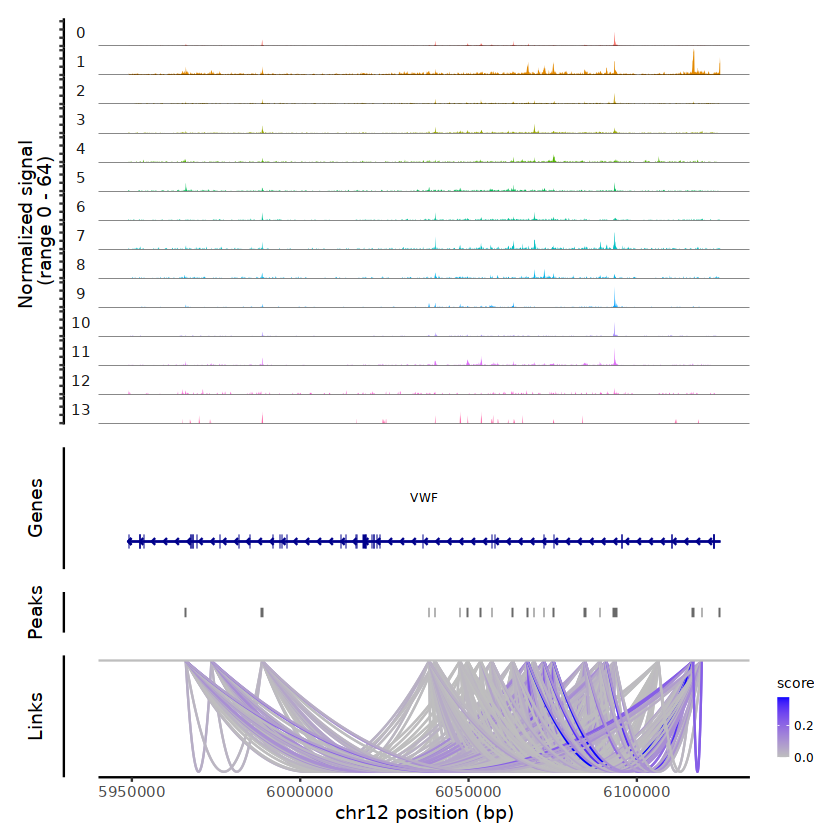

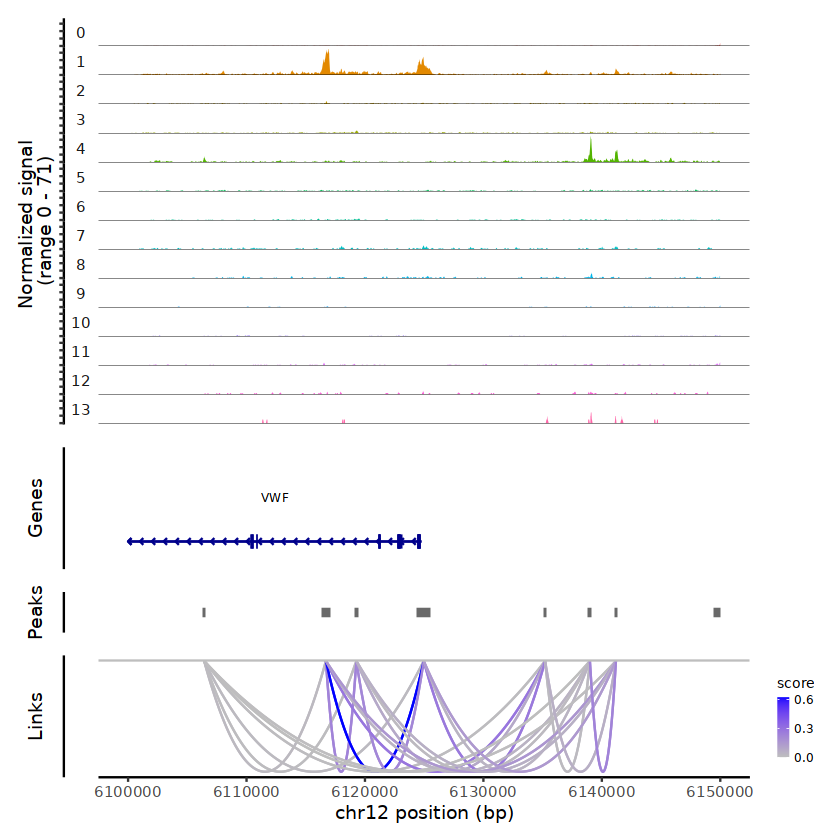

In [31]:
Idents(seurat_object) <- seurat_object$seurat_clusters
CoveragePlot(seurat_object, region = "VWF")

CoveragePlot(seurat_object, region = "chr12-6100000-6150000")

Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 59 rows containing missing values (`geom_segment()`)."


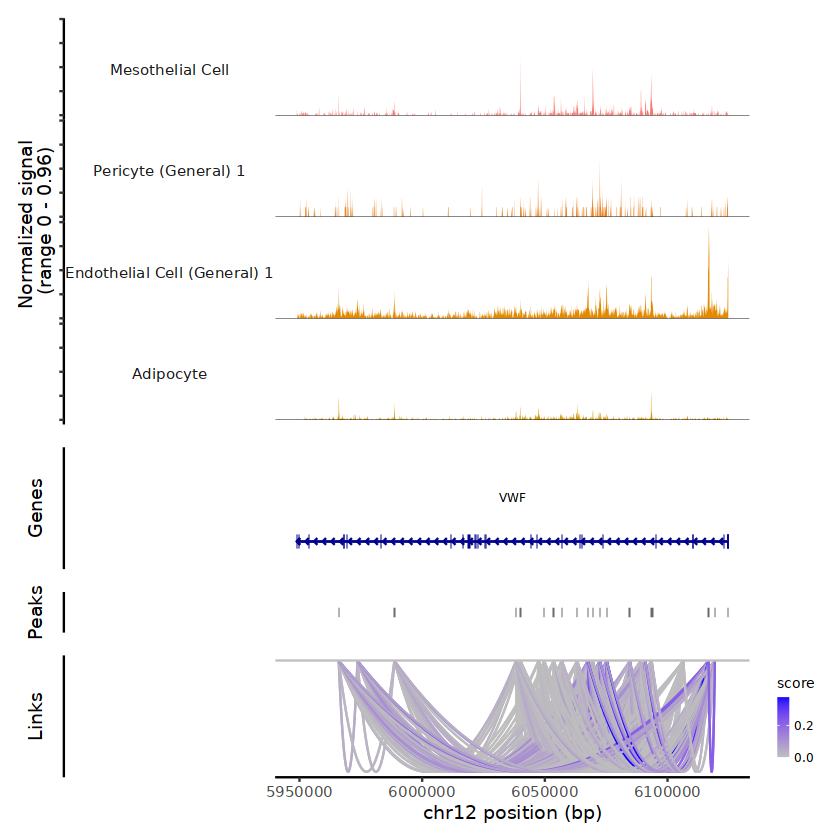

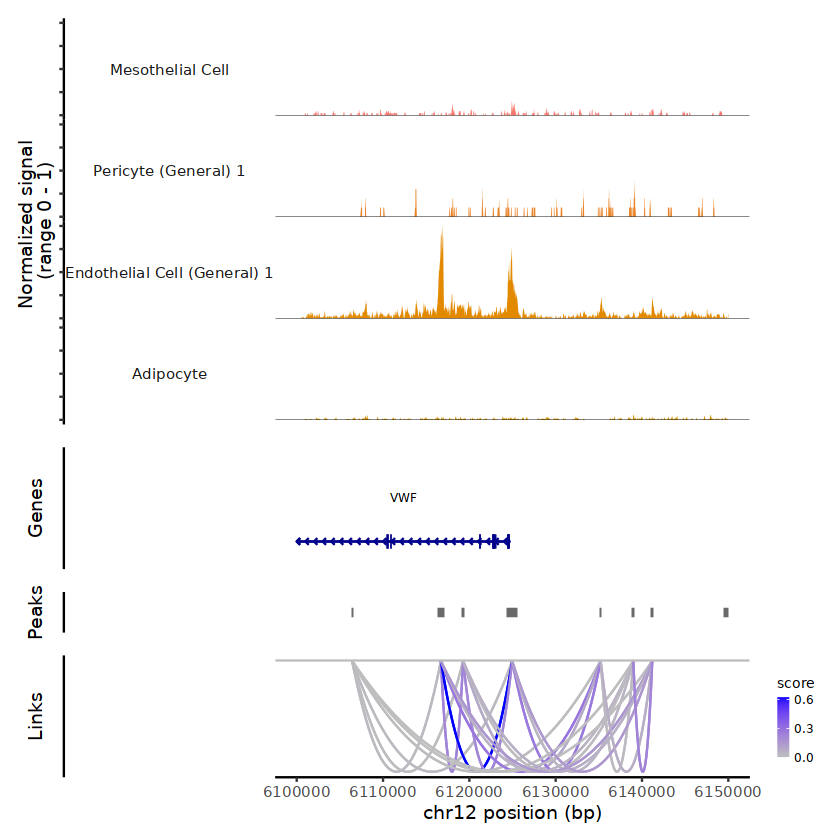

In [32]:
Idents(seurat_object) <- seurat_object$cell.type
CoveragePlot(seurat_object, region = "VWF", 
            idents = c("Mesothelial Cell", "Endothelial Cell (General) 1", "Pericyte (General) 1", "Adipocyte"))

CoveragePlot(seurat_object, region = "chr12-6100000-6150000",
            idents = c("Mesothelial Cell", "Endothelial Cell (General) 1", "Pericyte (General) 1", "Adipocyte"))

In [ ]:
#qsave(seurat_object, "complete/GSE184462_merged_1_10_CoAc.rds")